# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
num_mice= len(combined_data["Mouse ID"].unique())
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dupes_data = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]

# duplicate mice by ID number
dupes_mice = dupes_data["Mouse ID"].unique()

print(dupes_mice,)


['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes_data_mouse_id = combined_data.loc[combined_data["Mouse ID"]=="g989",:]

pd.DataFrame(dupes_data_mouse_id)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_clean = combined_data.drop(combined_data[combined_data["Mouse ID"]=="g989"].index)

# disply dataframe
combined_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Number of mice IDs after dropped ID. Should = num_mice-1(248)
num_mice_clean= len(combined_data_clean["Mouse ID"].unique())
print(num_mice_clean)

248


## Summary Statistics

In [9]:
print(combined_data_clean.columns)


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Group data by Drug Regimen
gd_DR= combined_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

# summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
gd_mean= gd_DR.mean()
gd_median = gd_DR.median()
gd_variance = gd_DR.var()
gd_std = gd_DR.std()
gd_sem = gd_DR.apply(lambda x: np.std(x)/ np.sqrt(len(x)))

# Assemble the resulting series into a single summary DataFrame.
ss_df= pd.DataFrame({'Mean': gd_mean,
    'Median': gd_median,
    'Variance': gd_variance,
    'Standard Deviation': gd_std,
    'SEM': gd_sem})


# disply dataframe
ss_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line(summary stats aggregated= ss_dfa )
ss_dfa = combined_data_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(['mean', 'median','var', 'std', 'sem'])

# Display the summary statistics table
ss_dfa

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

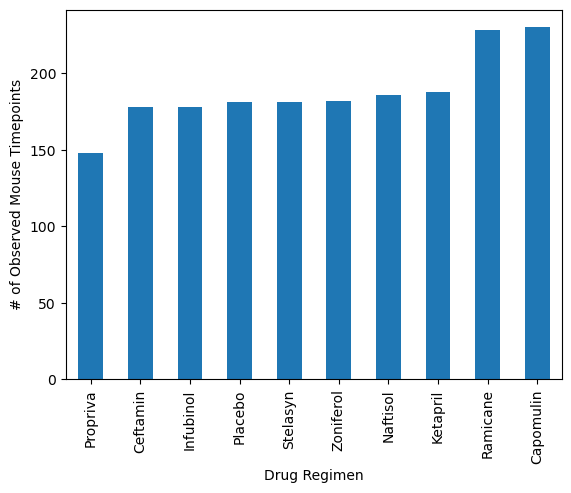

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

pandas_DR = combined_data_clean.groupby('Drug Regimen')['Mouse ID'].count()

# Sort the data by count
pandas_DR_sorted = pandas_DR.sort_values()

# Create a bar plot
pandas_DR_sorted.plot(kind='bar')

# Set the axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()

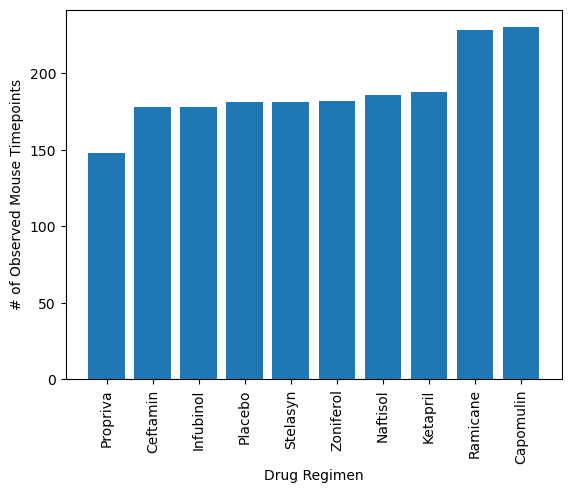

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_DR = combined_data_clean.groupby('Drug Regimen')['Mouse ID'].count()

# Sort the data by count
pyplot_DR_sorted = pyplot_DR.sort_values()

# Create a horizontal bar chart
plt.bar(pyplot_DR_sorted.index, pyplot_DR_sorted.values)

# Set the axis labels
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()


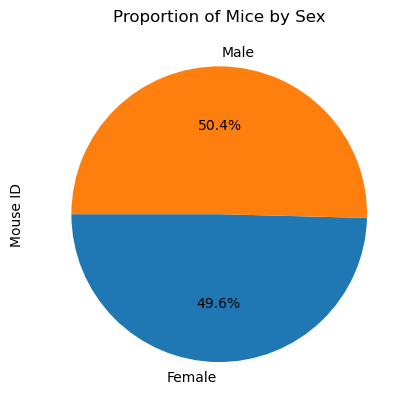

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cdc_df = combined_data_clean
# Identify distribution of data by sex
pandas_pc = cdc_df.groupby('Sex')['Mouse ID'].nunique()

# Plot a pie chart filled with corresponding percentages 
pandas_pc.plot = pandas_pc.plot(kind='pie', y='Sex', title='Proportion of Mice by Sex', autopct='%1.1f%%',startangle=180)

# Show the plot
plt.show()

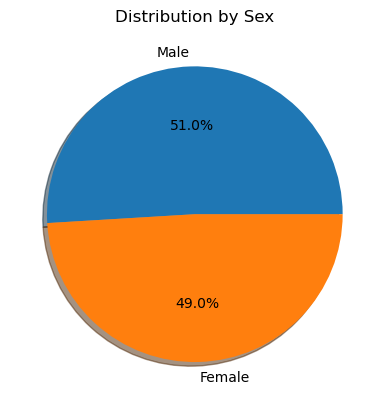

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of males and females
male_count = len(cdc_df[cdc_df['Sex'] == 'Male'])
female_count = len(cdc_df[cdc_df['Sex'] == 'Female'])


# Create a list of values to be plotted
values = [male_count, female_count]


# Create a list of labels for the pie chart
labels = ['Male', 'Female']

# Set the explode parameter to separate the slices of the pie chart
explode = [0.0, 0]

# Create the pie chart
plt.pie(values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)

# Add a title to the pie chart
plt.title('Distribution by Sex')

# Show the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [79]:
# Start by getting the last (greatest) timepoint for each mouse              
gtp_df = cdc_df.groupby('Mouse ID')['Timepoint'].max()  

print(gtp)


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64


In [80]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ftv_df= pd.merge(gtp_df,cdc_df, on= ['Mouse ID','Timepoint'])

# Disply
ftv_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol', 'Ceftamin']

In [82]:
# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

In [83]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    temp_df = ftv_df.loc[ftv_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Timepoint'].max()]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    vol_data.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 7.527130082500001
Lower Bound for Ramicane: 19.69048010125
Upper Bound for Ramicane: 49.79900043125001
Number of Ramicane outliers: 0
IQR for Infubinol: 4.9311172099999965
Lower Bound for Infubinol: 55.35777559500001
Upper Bound for Infubinol: 75.08224443499999
Number of Infubinol outliers: 0
IQR for Ceftamin: 6.093590140000003
Lower Bound for Ceftamin: 52.29350701999999
Upper Bound for Ceftamin: 76.66786758
Number of Ceftamin outliers: 0


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


In [84]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    temp_df = ftv_df.loc[ftv_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Timepoint'].max()]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    vol_data.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 7.527130082500001
Lower Bound for Ramicane: 19.69048010125
Upper Bound for Ramicane: 49.79900043125001
Number of Ramicane outliers: 0
IQR for Infubinol: 4.9311172099999965
Lower Bound for Infubinol: 55.35777559500001
Upper Bound for Infubinol: 75.08224443499999
Number of Infubinol outliers: 0
IQR for Ceftamin: 6.093590140000003
Lower Bound for Ceftamin: 52.29350701999999
Upper Bound for Ceftamin: 76.66786758
Number of Ceftamin outliers: 0


## Line and Scatter Plots

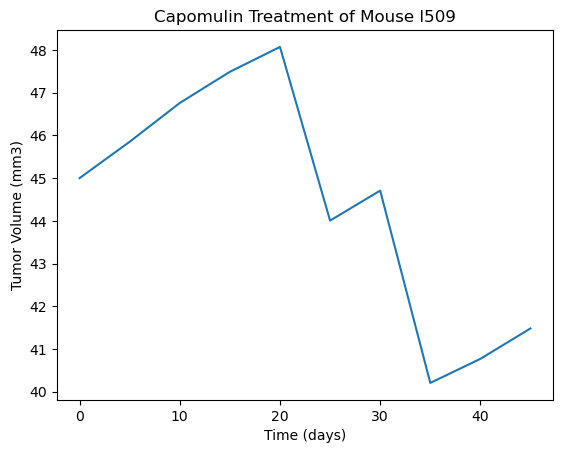

In [78]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = cdc_df.loc[cdc_df['Mouse ID'] == 'l509']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

# Display plot
plt.show()


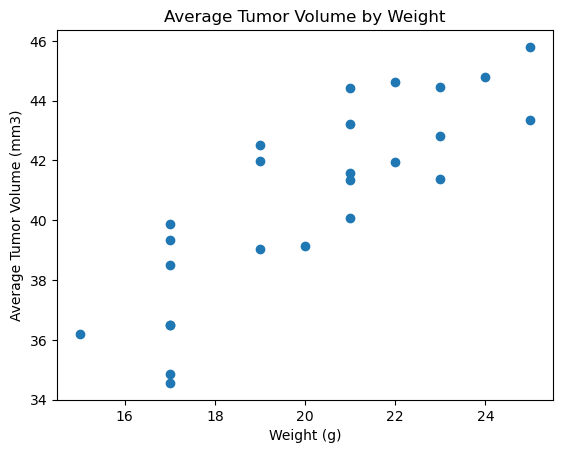

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Isolate cases that only use the Capomulin regimen
capomulin_df = cdc_df.loc[cdc_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Display plot
plt.show()

## Correlation and Regression

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Duplicate code for scatter plot from above:

capomulin_df = cdc_df.loc[cdc_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()


The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


NameError: name 'linregress' is not defined